## Setting Up the Environment

In [ ]:
import tensorflow as tf
print("GPU Available: ", tf.test.is_gpu_available())

print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available:  False
Tensorflow Version:  2.9.2
Keras Version:  2.9.0


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
print("Keras Version: ", tf.keras.__version__)

Keras Version:  2.9.0


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

[]


In [ ]:
! nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



## Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls /content/gdrive/MyDrive/'Colab Notebooks'/Kaggle

kaggle.json


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/Kaggle"

# Load Kaggle Data

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://www.kaggle.com/general/74235 

Follow the reference to conncet Kaggle with Colab


In [ ]:
#Check for kaggle.json File
!ls /content/gdrive/MyDrive/'Colab Notebooks'/Kaggle

kaggle.json


In [ ]:
#Give  Permisiions for kaggle.json file
! chmod 600 /content/gdrive/MyDrive/'Colab Notebooks'/Kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d moltean/fruits

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!kaggle config view #View current config values

Configuration values from /content/gdrive/MyDrive/Colab Notebooks/Kaggle
- username: jaswanthkarangula
- path: /content
- proxy: None
- competition: None


In [ ]:
!kaggle config set -n path -v /content

- path is now set to: /content


In [ ]:
#changing the working directory
%cd /content/datasets/moltean/fruits
!pwd
!ls

/content/datasets/moltean/fruits
/content/datasets/moltean/fruits
fruits-360_dataset  fruits-360-original-size  fruits.zip


In [ ]:
!unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [ ]:
# /content/datasets/moltean/fruits
os.chdir('/content/datasets/moltean/fruits')
!ls

fruits-360_dataset  fruits-360-original-size  fruits.zip


In [ ]:
!ls fruits-360_dataset/fruits-360

LICENSE  papers  readme.md  Test  test-multiple_fruits	Training


In [ ]:
!ls fruits-360_dataset/fruits-360/Training

'Apple Braeburn'       'Grape Blue'	     'Pear Monster'
'Apple Crimson Snow'   'Grapefruit Pink'     'Pear Red'
'Apple Golden 1'       'Grapefruit White'    'Pear Stone'
'Apple Golden 2'       'Grape Pink'	     'Pear Williams'
'Apple Golden 3'       'Grape White'	      Pepino
'Apple Granny Smith'   'Grape White 2'	     'Pepper Green'
'Apple Pink Lady'      'Grape White 3'	     'Pepper Orange'
'Apple Red 1'	       'Grape White 4'	     'Pepper Red'
'Apple Red 2'	        Guava		     'Pepper Yellow'
'Apple Red 3'	        Hazelnut	      Physalis
'Apple Red Delicious'   Huckleberry	     'Physalis with Husk'
'Apple Red Yellow 1'    Kaki		      Pineapple
'Apple Red Yellow 2'    Kiwi		     'Pineapple Mini'
 Apricot	        Kohlrabi	     'Pitahaya Red'
 Avocado	        Kumquats	      Plum
'Avocado ripe'	        Lemon		     'Plum 2'
 Banana		       'Lemon Meyer'	     'Plum 3'
'Banana Lady Finger'    Limes		      Pomegranate
'Banana Red'	        Lychee		     'Pomelo Sweetie'
 Beetroot	        Mand

In [ ]:
train_dir = 'fruits-360_dataset/fruits-360/Training'

In [ ]:
test_dir = 'fruits-360_dataset/fruits-360/Test'

# load these images off disk using image_dataset_from_directory
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
Old solution: Use ImageDataGenerator to rescale the images: https://keras.io/preprocessing/image/

In [ ]:
base_dir = '/content/datasets/moltean/fruits'
print(base_dir)

/content/datasets/moltean/fruits


In [ ]:
batch_size = 32
img_height = 128 #180
img_width = 128 #180

In [ ]:
# Establishes a Pipe line instead of loading the dataset directly
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 67692 files belonging to 131 classes.
Using 54154 files for training.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 67692 files belonging to 131 classes.
Using 13538 files for validation.


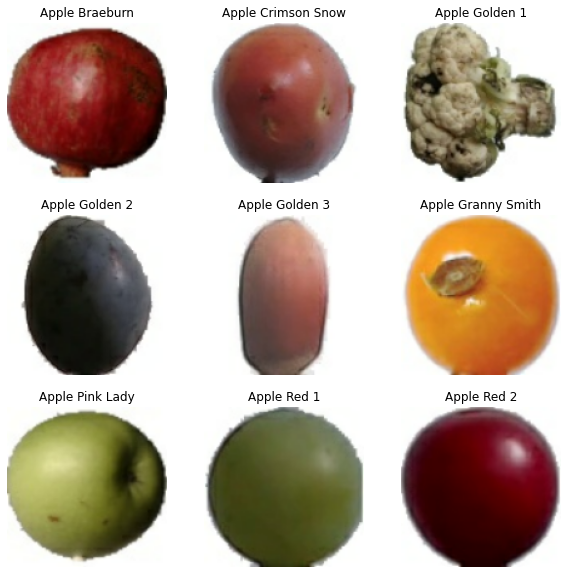

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, groundlabels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

In [ ]:
#manually iterate over the dataset and retrieve batches of images:
#This is a batch of 32 images of shape 180x180x3 (the last dimension referes to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 128, 128, 3)
(32,)


In [ ]:
# number of batches
train_ds.cardinality().numpy()

1693

In [ ]:
#Standardize the data, standardize values [0, 255] to be in the [0, 1]
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

#There are two ways to use this layer. You can apply it to the dataset by calling map:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.14575292 1.0


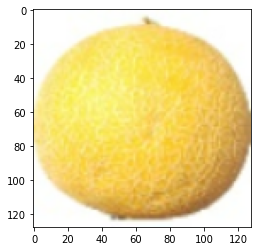

In [ ]:

plt.imshow(first_image)

# Train a model

In [ ]:
#Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = len(class_names)
num_classes

131

In [ ]:
model = tf.keras.Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
1693/1693 [==============================] - 51s 30ms/step - loss: 0.6417 - accuracy: 0.8712 - val_loss: 0.0513 - val_accuracy: 0.9842
Epoch 2/20
1693/1693 [==============================] - 18s 11ms/step - loss: 0.0872 - accuracy: 0.9763 - val_loss: 0.0918 - val_accuracy: 0.9705
Epoch 3/20
1693/1693 [==============================] - 18s 11ms/step - loss: 0.0841 - accuracy: 0.9794 - val_loss: 0.0328 - val_accuracy: 0.9899
Epoch 4/20
1693/1693 [==============================] - 19s 11ms/step - loss: 0.0517 - accuracy: 0.9870 - val_loss: 0.2337 - val_accuracy: 0.9641
Epoch 5/20
1693/1693 [==============================] - 18s 11ms/step - loss: 0.0549 - accuracy: 0.9866 - val_loss: 0.0327 - val_accuracy: 0.9924
Epoch 6/20
1693/1693 [==============================] - 18s 10ms/step - loss: 0.0608 - accuracy: 0.9871 - val_loss: 0.0185 - val_accuracy: 0.9950
Epoch 7/20
1693/1693 [==============================] - 18s 11ms/step - loss: 0.0616 - accuracy: 0.9873 - val_loss: 0.0275 -

In [ ]:
def plot_history(history, metric, val_metric):
  acc = history.history[metric]
  val_acc = history.history[val_metric]

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  epochs_range = range(len(acc))

  fig=plt.figure(figsize=(12, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylim([min(plt.ylim()),1])
  plt.grid(True)
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.title('Training and Validation Loss')
  plt.show()
  fig.savefig('traininghistory.pdf')

# plot_history(history, 'accuracy', 'val_accuracy')

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

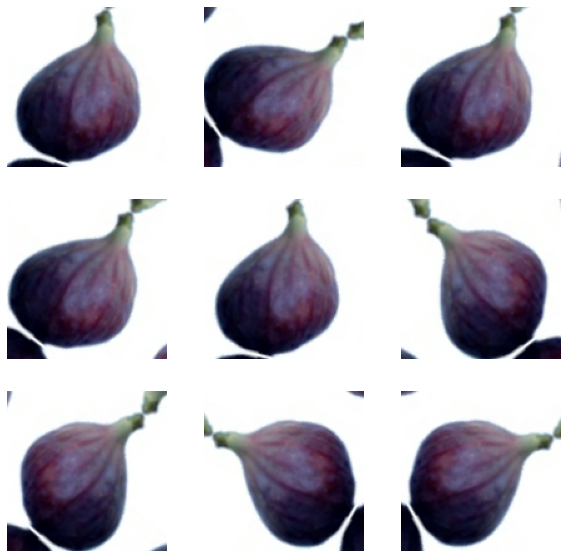

In [ ]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
#tf.keras.applications.MobileNetV2 for use as your base model, This model expects pixel vaues in [-1,1]
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SIZE = (img_height, img_width)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
IMG_SHAPE

(128, 128, 3)

In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 4, 4, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

In [ ]:
#Add a classification head
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
num_classes = len(class_names)
num_classes

131

In [ ]:
#Apply a tf.keras.layers.Dense layer to convert these features into a single prediction per image.
#You don't need an activation function here because this prediction will be treated as a logit, or a raw prediction value
prediction_layer = tf.keras.layers.Dense(num_classes)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 131)


In [ ]:
#Build a model by chaining together the data augmentation, rescaling, base_model and feature extractor layers using the Keras Functional API
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
#Compile the model before training it. 
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 128, 128, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 128, 128, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                             

In [ ]:
model.trainable_variables #two tf.Variable objects, the weights and biases

[<tf.Variable 'dense_2/kernel:0' shape=(1280, 131) dtype=float32, numpy=
 array([[-0.0552043 ,  0.05824899, -0.05580749, ...,  0.06301795,
          0.03495171,  0.01903195],
        [ 0.05278026,  0.00479005, -0.00350541, ...,  0.01031356,
         -0.02224024,  0.0058644 ],
        [-0.01682212,  0.01934566,  0.03821393, ..., -0.0228546 ,
          0.06216122, -0.03862183],
        ...,
        [ 0.05142927,  0.0551263 , -0.03760261, ..., -0.01831666,
         -0.06267837,  0.04482357],
        [ 0.01541442,  0.02644785, -0.05781612, ...,  0.03656215,
          0.03981047,  0.06384158],
        [ 0.03931433, -0.04905509,  0.03477834, ...,  0.04985762,
          0.04854307, -0.04286285]], dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(131,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
loss0, accuracy0 = model.evaluate(val_ds)

424/424 [==============================] - 159s 369ms/step - loss: 5.3723 - accuracy: 0.0036


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 5.37
initial accuracy: 0.00


In [ ]:
#Train the model
history = model.fit(train_ds,
                    epochs=30,
                    validation_data=val_ds)

Epoch 1/30
1414/1693 [========================>.....] - ETA: 2:02 - loss: 1.9309 - accuracy: 0.6151